In [25]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import random

In [26]:
class multi_armed_bandit:
    def __init__(self, k, bandits):
        self.k = k
        self.bandits = bandits
        self.qn = np.zeros((self.bandits, self.k))
        self.true_rewards =  np.zeros((self.bandits, k))
        self.max_arms = np.argmax(self.true_rewards, 1)
        
    def random_walks(self):
        self.true_rewards += np.random.normal(0,0.01,(self.bandits, self.k))
        self.max_arms = np.argmax(self.true_rewards, 1)
        
    def increment_method(self, i, j, R, alpha):
        self.qn[i][j] += alpha*(R - self.qn[i][j])
        
    def sampled_average(self):
        pass

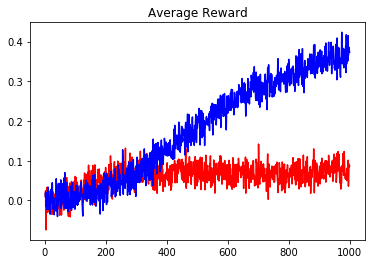

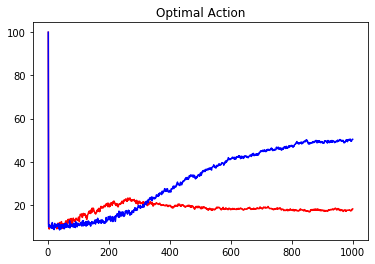

In [27]:
fig1 = plt.figure().add_subplot(111)
fig2 = plt.figure().add_subplot(111)

UCB_rewards = []
UCB_opt_pulls = []
UCB_testbed = multi_armed_bandit(10,2000)
epsilon = 0.1
UCB_n = np.zeros((UCB_testbed.bandits, UCB_testbed.k))
c = 2

rewards = []
opt_pulls = []
testbed = multi_armed_bandit(10,2000)
epsilon = 0
n = np.zeros((testbed.bandits, testbed.k))
testbed.qn += 5

for i in range(1,1001,1):
    UCB_opt_pull = 0
    temp_UCB_rewards = []
    
    opt_pull = 0
    temp_rewards = []
    
    for j in range(UCB_testbed.bandits):
        
        max_value = 0
        for l in range(len(UCB_n[j])):
            if(UCB_n[j][l] == 0):
                UCB_p = l
                break
            else:
                if(max_value < UCB_testbed.qn[j][l] + np.sqrt(c*np.log(i))/UCB_n[j][l]):
                    max_value = UCB_testbed.qn[j][l] + np.sqrt(c*np.log(i))/UCB_n[j][l]
                    UCB_p = l
                    
        if(random.random() < epsilon):
            p = np.random.randint(testbed.k)
        else:
            p = np.argmax(testbed.qn[j])
            
        if(UCB_p == UCB_testbed.max_arms[j]):
            UCB_opt_pull+=1
            
        if(p == testbed.max_arms[j]):
            opt_pull += 1
            
        UCB_curr_reward = np.random.normal(UCB_testbed.true_rewards[j][UCB_p], 1)
        temp_UCB_rewards.append(UCB_curr_reward)
        
        curr_reward = np.random.normal(testbed.true_rewards[j][p], 1)
        temp_rewards.append(curr_reward)
        
        UCB_n[j][UCB_p]+=1
        UCB_testbed.increment_method(j, UCB_p, UCB_curr_reward, 0.1)
        
        n[j][p]+=1
        testbed.increment_method(j, p, curr_reward, 0.1)
        
    UCB_testbed.random_walks()
    testbed.random_walks()
        
    avg_reward = np.mean(temp_UCB_rewards)
    UCB_rewards.append(avg_reward)
    UCB_opt_pulls.append(float(UCB_opt_pull)/20)
    
    avg_reward = np.mean(temp_rewards)
    rewards.append(avg_reward)
    opt_pulls.append(float(opt_pull)/20)
    
fig1.plot(range(1,1001,1), UCB_rewards, 'r')
fig1.plot(range(1,1001,1), rewards, 'b')

fig2.plot(range(1,1001,1), UCB_opt_pulls, 'r')
fig2.plot(range(1,1001,1), opt_pulls, 'b')

fig1.title.set_text('Average Reward')
fig2.title.set_text('Optimal Action')

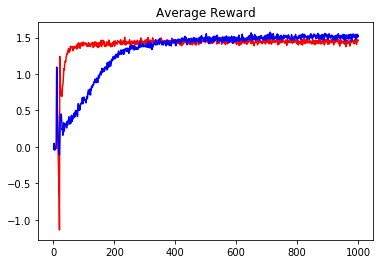

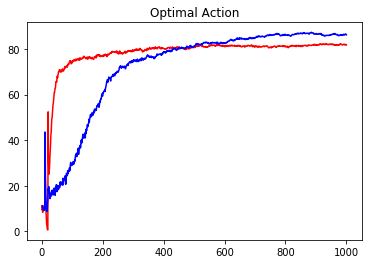

In [28]:
fig1 = plt.figure().add_subplot(111)
fig2 = plt.figure().add_subplot(111)

UCB_rewards = []
UCB_opt_pulls = []
UCB_testbed = multi_armed_bandit(10,2000)
epsilon = 0.1
UCB_n = np.zeros((UCB_testbed.bandits, UCB_testbed.k))
c = 2
UCB_testbed.true_rewards = np.random.normal(0,1,(UCB_testbed.bandits, UCB_testbed.k))
UCB_testbed.max_arms = np.argmax(UCB_testbed.true_rewards, 1)

rewards = []
opt_pulls = []
testbed = multi_armed_bandit(10,2000)
epsilon = 0
n = np.zeros((testbed.bandits, testbed.k))
testbed.true_rewards = np.random.normal(0,1,(testbed.bandits, testbed.k))
testbed.max_arms = np.argmax(testbed.true_rewards, 1)
testbed.qn += 5

for i in range(1,1001,1):
    UCB_opt_pull = 0
    temp_UCB_rewards = []
    
    opt_pull = 0
    temp_rewards = []
    
    for j in range(UCB_testbed.bandits):
        
        max_value = 0
        for l in range(len(UCB_n[j])):
            if(UCB_n[j][l] == 0):
                UCB_p = l
                break
            else:
                if(max_value < UCB_testbed.qn[j][l] + np.sqrt(c*np.log(i))/UCB_n[j][l]):
                    max_value = UCB_testbed.qn[j][l] + np.sqrt(c*np.log(i))/UCB_n[j][l]
                    UCB_p = l
                    
        if(random.random() < epsilon):
            p = np.random.randint(testbed.k)
        else:
            p = np.argmax(testbed.qn[j])
            
        if(UCB_p == UCB_testbed.max_arms[j]):
            UCB_opt_pull+=1
            
        if(p == testbed.max_arms[j]):
            opt_pull += 1
            
        UCB_curr_reward = np.random.normal(UCB_testbed.true_rewards[j][UCB_p], 1)
        temp_UCB_rewards.append(UCB_curr_reward)
        
        curr_reward = np.random.normal(testbed.true_rewards[j][p], 1)
        temp_rewards.append(curr_reward)
        
        UCB_n[j][UCB_p]+=1
        UCB_testbed.increment_method(j, UCB_p, UCB_curr_reward, 0.1)
        
        n[j][p]+=1
        testbed.increment_method(j, p, curr_reward, 0.1)
        
    avg_reward = np.mean(temp_UCB_rewards)
    UCB_rewards.append(avg_reward)
    UCB_opt_pulls.append(float(UCB_opt_pull)/20)
    
    avg_reward = np.mean(temp_rewards)
    rewards.append(avg_reward)
    opt_pulls.append(float(opt_pull)/20)
    
fig1.plot(range(1,1001,1), UCB_rewards, 'r')
fig1.plot(range(1,1001,1), rewards, 'b')

fig2.plot(range(1,1001,1), UCB_opt_pulls, 'r')
fig2.plot(range(1,1001,1), opt_pulls, 'b')

fig1.title.set_text('Average Reward')
fig2.title.set_text('Optimal Action')